In [2]:
import bempp.api
import numpy as np
import scipy
from numba import objmode
import numba
import cmath
import math
%matplotlib inline
import matplotlib.pyplot as plt
from bempp.api.operators.far_field import helmholtz as helmholtz_farfield
bempp.core.opencl_kernels.set_default_device(0,0)

In [ ]:
10 0.4130100303248738 3.5555555555555562
11 -2.2315605707265216 4.732444444444445
12 1.0652188411758046 6.144000000000001
13 -2.2825909293476774 7.8115555555555565
14 0.272359068892756 9.756444444444446
15 2.4286862726541427 12.000000000000002
16 -2.113726565117436 14.563555555555558
17 -0.8035259329919027 17.468444444444447
18 0.06381207024013336 20.736
19 0.47960679374352666 24.387555555555558
20 0.4396044226217552 28.44444444444445

In [9]:
theta_value = [0.4130100303248738, -2.2315605707265216, 1.0652188411758046, -2.2825909293476774, 0.272359068892756,
              2.4286862726541427, -2.113726565117436, -0.8035259329919027, 0.06381207024013336, 0.47960679374352666, 0.4396044226217552]
l1 = [3.5555555555555562, 4.732444444444445, 6.144000000000001, 7.8115555555555565, 9.756444444444446, 12.000000000000002, 
     14.563555555555558, 17.468444444444447, 20.736, 24.387555555555558, 28.44444444444445]
l2 = [6.283185307179587, 7.6026542216873, 9.047786842338605, 10.618583169133501, 12.31504320207199, 14.13716694115407, 16.084954386379742,
      18.158405537749005, 20.35752039526186, 22.68229895891831, 25.13274122871835]

In [10]:
sum_list = [a + b for a, b in zip(l1, l2)]
print(sum_list)

[7.681380098815465, 9.838740862735143, 12.335098666131746, 15.191786842338605, 18.43013872468906, 22.071487646516438, 26.13716694115407, 30.648509941935302, 35.62684998219345, 41.09352039526186, 47.06985451447387, 53.5771856731628]


In [30]:
#k = 10: 3.5555555555555562, 7.681380098815465
print(0.4130100303248738, 0.4130100303248738+ 2*np.pi)

0.4130100303248738 6.69619533750446


In [19]:
#k = 11: 4.732444444444445, 9.838740862735143
print(-2.2315605707265216 + 2*np.pi, -2.2315605707265216 + 4*np.pi)

4.051624736453064 10.33481004363265


In [21]:
#k = 12: 6.144000000000001, 12.335098666131746
print(1.0652188411758046 + 2*np.pi, 1.0652188411758046 + 4*np.pi)

7.348404148355391 13.631589455534977


In [25]:
#k = 13: 7.8115555555555565,  15.191786842338605
print(-2.2825909293476774 + 4*np.pi, -2.2825909293476774 + 6*np.pi)

10.283779685011496 16.56696499219108


In [27]:
#k = 14: 9.756444444444446, 18.43013872468906
print(0.272359068892756 + 4 * np.pi,0.272359068892756 + 6 * np.pi )

12.838729683251929 19.121914990431513


In [8]:
#k = 15: 12.000000000000002, 26.13716694115407
print(2.4286862726541427 + 4 * np.pi, 2.4286862726541427 + 8 * np.pi)

14.995056887013316 27.56142750137249


In [34]:
#k = 16: 14.563555555555558, 30.648509941935302
print(-2.113726565117436 + 6*np.pi, -2.113726565117436 + 10*np.pi)

16.735829356421323 29.302199970780496


In [36]:
#k = 17: 17.468444444444447, 35.62684998219345
print(-0.8035259329919027 + 6*np.pi, -0.8035259329919027 + 12*np.pi)

18.046029988546856 36.895585910085615


In [41]:
#k = 18: 20.736, 41.09352039526186
print(0.06381207024013336 + 6*np.pi, 0.06381207024013336 + 14*np.pi)

18.91336799177889 44.046109220497236


In [43]:
#k = 19: 24.387555555555558, 47.06985451447387
print(0.47960679374352666 + 8*np.pi, 0.47960679374352666 + 16*np.pi)

25.612348022461873 50.74508925118022


In [44]:
#k = 20: 28.44444444444445, 53.5771856731628
print(0.4396044226217552 + 10 * np.pi, 0.4396044226217552 + 18 * np.pi)

31.855530958519687 56.98827218723803


In [3]:
x_axis = range(10,21)
theta_value1 = [0.4130100303248738, 4.051624736453064, 7.348404148355391, 10.283779685011496, 12.838729683251929, 14.995056887013316, 16.735829356421323, 
                18.046029988546856, 18.91336799177889, 25.612348022461873, 31.855530958519687]
theta_value2 = [6.69619533750446, 10.33481004363265, 13.631589455534977, 16.56696499219108, 19.121914990431513, 27.56142750137249, 29.302199970780496, 
                36.895585910085615, 44.046109220497236, 50.74508925118022, 56.98827218723803]
y_axis1 = []
for i in x_axis:
    y_axis1.append(1/(3*np.pi) * ((i)**3) * ((4/3) * np.pi*0.2**3))
    
y_axis2 = []
for i in x_axis:
    y_axis2.append(1/(3*np.pi) * ((i)**3) * ((4/3) * np.pi*0.2**3) + (1/8)* (4 * np.pi * 0.2**2) * (i**2))

error1 = []
for i in range(len(x_axis)):
    error1.append(abs(theta_value1[i] - y_axis1[i])/theta_value1[i])
    
error2 = []
for i in range(len(x_axis)):
    error2.append(abs(theta_value2[i] - y_axis2[i])/theta_value2[i])

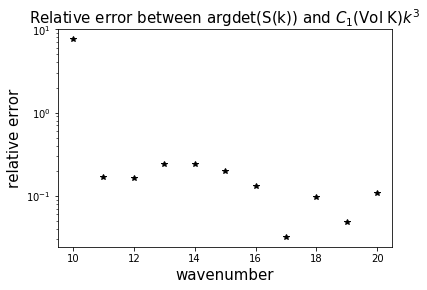

In [4]:
plt.semilogy(x_axis,error1, 'k*')
plt.xlabel('wavenumber',fontsize = 15)
plt.ylabel('relative error', fontsize = 15)
plt.title('Relative error between argdet(S(k)) and $C_{1}$(Vol K)$k^{3}$',fontsize = 15)
plt.savefig('Relativer error one term.pdf',bbox_inches='tight')

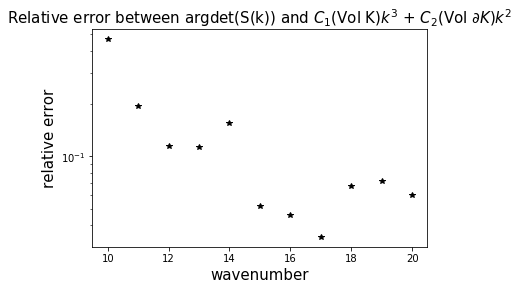

In [48]:
plt.semilogy(x_axis,error2, 'k*')
plt.xlabel('wavenumber',fontsize = 15)
plt.ylabel('relative error', fontsize = 15)
plt.title('Relative error between argdet(S(k)) and $C_{1}$(Vol K)$k^{3}$ + $C_{2}$(Vol $\partial K$)$k^{2}$',fontsize = 15)
plt.savefig('Relativer error two terms.pdf',bbox_inches='tight')

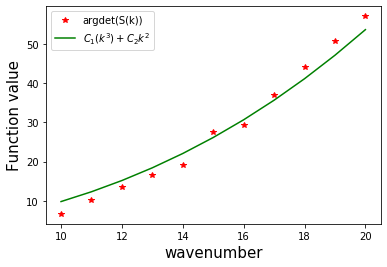

In [52]:
plt.plot(x_axis,theta_value2,'r*')
plt.plot(x_axis,y_axis2,'g-')
plt.xlabel('wavenumber',fontsize = 15)
plt.ylabel('Function value', fontsize = 15)
plt.legend(['argdet(S(k))', '$C_{1}(k^{3})+C_{2}k^{2}$'])
plt.savefig('Compare value two terms.pdf',bbox_inches='tight')

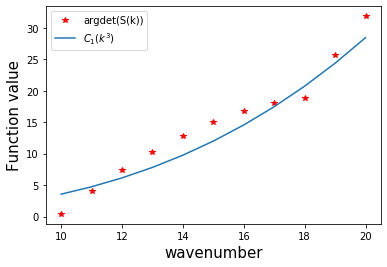

In [50]:
plt.plot(x_axis,theta_value1,'r*')
plt.plot(x_axis,y_axis1,'-')
plt.xlabel('wavenumber',fontsize = 15)
plt.ylabel('Function value', fontsize = 15)
plt.legend(['argdet(S(k))', '$C_{1}(k^{3})$'])
plt.savefig('Compare value one term.pdf',bbox_inches='tight')